In [39]:
#Import necessary libraries
import pandas as pd
import os
import requests
import numpy as np
import requests
from pprint import pprint
import json
import gmaps
import matplotlib.pyplot as plt
import numpy as np

# Import API key
from api_keys import g_key

import datetime
from scipy.stats import linregress

In [40]:
# import clean_country_data.csv from file
filename = os.path.join("clean_data_files","clean_data_by_country.csv")
country_data  = pd.read_csv(filename)
del country_data["Unnamed: 0"]
del country_data["JH Confirmed"]
del country_data["JH Recovered"]
country_data.head()

,Country Name,Country Code,2018 GDP USD,JH Deaths,Area (mi2),Population,Population Density (mi2),Lat,Lng
0,Afghanistan,AFG,1.948438e+10,1437.0,249347.0,31.575018,127.0,33.836449,66.008762
1,Albania,ALB,1.514702e+10,358.0,11082.0,2.862427,258.0,41.142382,20.053634
2,Algeria,DZA,1.740000e+11,1665.0,919595.0,43.000000,47.0,28.148952,2.653180
3,Andorra,AND,3.218316e+09,53.0,179.0,0.076177,425.0,42.542353,1.561301
4,Angola,AGO,1.010000e+11,147.0,481354.0,29.250009,61.0,-12.292289,17.536979


In [41]:
# Formatting and renaming
country_data["JH Deaths (K)"] = country_data["JH Deaths"]/1000
country_data["% Total Deaths"] = (country_data["JH Deaths"]/country_data["JH Deaths"].sum())*100
country_data["% Global Population"] = (country_data["Population"]/country_data["Population"].sum())*100
country_data["% Global Pop Density"] = (country_data["Population Density (mi2)"]/country_data["Population Density (mi2)"].sum())*100
country_data["2018 GDP (100T)"] = country_data["2018 GDP USD"]/100000000000
country_data["2018 GDP(M)"] = country_data["2018 GDP USD"]/1000000
country_data["2018 GDP(T)"] = country_data["2018 GDP USD"]/1000000000
country_data.rename(columns={"Population": "Population (M)"}, inplace=True)
country_data.describe()

,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,% Global Population,% Global Pop Density,2018 GDP (100T),2018 GDP(M),2018 GDP(T)
count,1.730000e+02,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02,173.000000
mean,4.852408e+11,6545.017341,2.866351e+05,42.718837,808.886994,20.100222,16.440287,6.545017,0.578035,0.578035,0.578035,4.852408,4.852408e+05,485.240850
std,1.968353e+12,24483.319395,7.818937e+05,152.882524,4048.825340,24.484442,57.841837,24.483319,2.162287,2.068675,2.893311,19.683529,1.968353e+06,1968.352944
min,4.222959e+08,0.000000,7.800000e-01,0.034641,5.400000,-41.829454,-112.494334,0.000000,0.000000,0.000469,0.003859,0.004223,4.222959e+02,0.422296
25%,1.262885e+10,46.000000,1.108200e+04,2.413643,93.000000,4.516800,-8.396407,0.046000,0.004063,0.032659,0.066458,0.126289,1.262885e+04,12.628855
50%,4.223130e+10,225.000000,5.525100e+04,9.397800,211.000000,18.155195,19.394358,0.225000,0.019871,0.127163,0.150782,0.422313,4.223130e+04,42.231296
75%,2.450000e+11,1665.000000,2.100260e+05,30.280811,520.000000,41.461831,43.744674,1.665000,0.147047,0.409734,0.371595,2.450000,2.450000e+05,245.000000
max,2.050000e+13,224890.000000,6.612093e+06,1404.513080,49107.000000,68.795828,171.462581,224.890000,19.861555,19.004667,35.092107,205.000000,2.050000e+07,20500.000000


In [42]:
#Create gmap visualization of COVID deaths by country
# access maps with unique API key
gmaps.configure(api_key=g_key)
locations = country_data[["Lat","Lng"]]
JH_deaths = country_data["JH Deaths"]
GDP = country_data["2018 GDP (100T)"]
# create intial gmap figure
fig = gmaps.figure()
# add heatmap layer
death_layer = gmaps.heatmap_layer(locations, weights=JH_deaths, dissipating=False, max_intensity=500, point_radius=0.9)
GDP_layer = gmaps.heatmap_layer(locations, weights=GDP, dissipating=True, max_intensity=1000, point_radius=15)
#GDP_layer.gradient = ['white','silver','black']
# add heatmap layer to figure
fig.add_layer(death_layer)
fig.add_layer(GDP_layer)
# Display the figure
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
country_data.head()

,Country Name,Country Code,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,% Global Population,% Global Pop Density,2018 GDP (100T),2018 GDP(M),2018 GDP(T)
0,Afghanistan,AFG,1.948438e+10,1437.0,249347.0,31.575018,127.0,33.836449,66.008762,1.437,0.126911,0.427246,0.090755,0.194844,19484.384937,19.484385
1,Albania,ALB,1.514702e+10,358.0,11082.0,2.862427,258.0,41.142382,20.053634,0.358,0.031617,0.038732,0.184368,0.151470,15147.020535,15.147021
2,Algeria,DZA,1.740000e+11,1665.0,919595.0,43.000000,47.0,28.148952,2.653180,1.665,0.147047,0.581839,0.033586,1.740000,174000.000000,174.000000
3,Andorra,AND,3.218316e+09,53.0,179.0,0.076177,425.0,42.542353,1.561301,0.053,0.004681,0.001031,0.303707,0.032183,3218.316013,3.218316
4,Angola,AGO,1.010000e+11,147.0,481354.0,29.250009,61.0,-12.292289,17.536979,0.147,0.012983,0.395786,0.043591,1.010000,101000.000000,101.000000


TypeError: 'Series' object is not callable

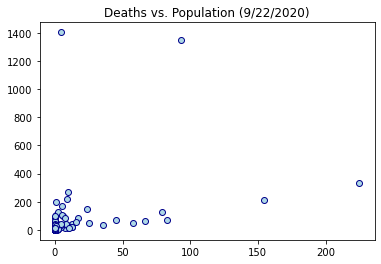

In [44]:
# Deaths vs Population
x_data = country_data["JH Deaths (K)"]
y_data = country_data["Population (M)"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Deaths vs. Population ({today.month}/{today.day}/{today.year})")
plt.xlabel("Deaths/K")
plt.ylabel("Population (M)")
plt.grid(True)
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 1000), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
# output plot to file
output_path_fig1 = os.path.join("charts","Deaths vs Population - scatter.jpg")
plt.savefig(output_path_fig1)

TypeError: 'Series' object is not callable

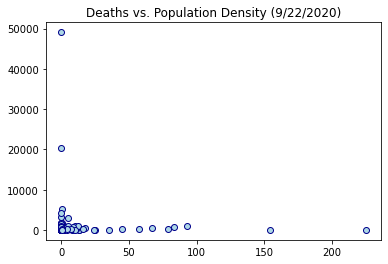

In [45]:
# Deaths vs Population Density
x_data = country_data["JH Deaths (K)"]
y_data = country_data["Population Density (mi2)"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Deaths vs. Population Density ({today.month}/{today.day}/{today.year})")
plt.xlabel("JH Deaths/K")
plt.ylabel("Population Density (mi2)")
plt.grid(True)
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 30000), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
# output plot to file
output_path_fig2 = os.path.join("charts","Deaths vs Population Density - scatter.jpg")
plt.savefig(output_path_fig2)

TypeError: 'Series' object is not callable

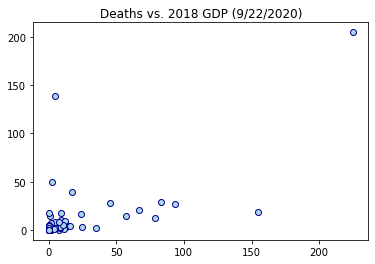

In [46]:
# Deaths vs Population Density
x_data = country_data["JH Deaths (K)"]
y_data = country_data["2018 GDP (100T)"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Deaths vs. 2018 GDP ({today.month}/{today.day}/{today.year})")
plt.xlabel("Deaths/K")
plt.ylabel("2018 GDP ($MM USD)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 175), fontsize=15, color="red")
plt.grid(True)
# add pearson's r value to plot 
print(f"r = {rvalue}")
# output plot to file
output_path_fig3 = os.path.join("charts","Deaths vs GDP - scatter.jpg")
plt.savefig(output_path_fig3)

In [47]:
# % of Total deaths by Country
country_data_death_sort = country_data.sort_values(by=["% Total Deaths"], ascending=False)
country_death_top_20 = country_data_death_sort.head(20)
country_death_top_20 .describe()

,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,% Global Population,% Global Pop Density,2018 GDP (100T),2018 GDP(M),2018 GDP(T)
count,2.000000e+01,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.00000
mean,2.300100e+12,50003.250000,1.014832e+06,150.927589,343.100000,21.432288,-13.622436,50.003250,4.416125,2.042223,0.245181,23.001000,2.300100e+06,2300.10000
std,4.417501e+12,56159.983314,1.672417e+06,296.408200,361.147572,33.692127,64.634972,56.159983,4.959867,4.010742,0.258078,44.175011,4.417501e+06,4417.50109
min,1.080000e+11,9448.000000,1.184900e+04,10.343403,22.000000,-37.734626,-112.494334,9.448000,0.834417,0.139958,0.015721,1.080000,1.080000e+05,108.00000
25%,4.820000e+11,12686.500000,1.325112e+05,28.514718,65.000000,-3.955657,-71.793003,12.686500,1.120430,0.385837,0.046449,4.820000,4.820000e+05,482.00000
50%,1.130000e+12,24402.500000,3.663805e+05,59.513923,165.500000,32.088178,-2.820182,24.402500,2.155150,0.805291,0.118267,11.300000,1.130000e+06,1130.00000
75%,2.245000e+12,69829.500000,8.380165e+05,131.652540,539.250000,50.754728,13.242863,69.829500,6.167115,1.781409,0.385351,22.450000,2.245000e+06,2245.00000
max,2.050000e+13,224890.000000,6.612093e+06,1352.642280,1092.000000,62.777378,117.268942,224.890000,19.861555,18.302796,0.780349,205.000000,2.050000e+07,20500.00000


TypeError: 'Series' object is not callable

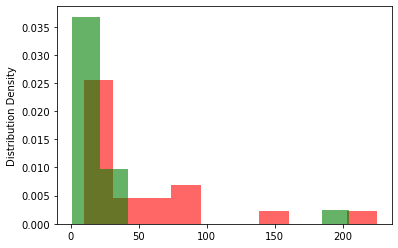

In [48]:
# Create histogram of top 20 by % of death
deaths_top_20 = country_death_top_20["JH Deaths (K)"]
gdp_top_20 = country_death_top_20["2018 GDP (100T)"]
plt.hist(deaths_top_20, density=True, color='red', alpha=0.6, label="Number of Deaths ($) 100 Trillion")
plt.hist(gdp_top_20, density=True, color='green', alpha=0.6, label="GDP (USD 100 Trillion)")
plt.ylabel("Distribution Density")
plt.xlabel("Numbers by Dollars (100 Trillions) and Deaths (1000)")
plt.title(f"Deaths (1000) and GDP (USD 100 Trillion) ({today.month}/{today.day}/{today.year})")
plt.grid(True)
plt.legend()
output_path_fig4 = os.path.join("charts","Global Histogram.jpg")
plt.savefig(output_path_fig4)

In [49]:
country_data_death_sort
country_top_50 = country_data_death_sort.head(30)
country_top_50

,Country Name,Country Code,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,% Global Population,% Global Pop Density,2018 GDP (100T),2018 GDP(M),2018 GDP(T)
166,United States,USA,2.050000e+13,224890.0,3796742.0,330.335620,87.0,45.687533,-112.494334,224.890,19.861555,4.469818,0.062171,205.000000,2.050000e+07,20500.000000
23,Brazil,BRA,1.890000e+12,154515.0,3287956.0,212.091336,65.0,-10.781145,-53.092536,154.515,13.646263,2.869838,0.046449,18.900000,1.890000e+06,1890.000000
75,India,IND,2.710000e+12,93092.0,1269219.0,1352.642280,1066.0,22.888100,79.615894,93.092,8.221583,18.302796,0.761769,27.100000,2.710000e+06,2710.000000
165,United Kingdom,GBR,2.860000e+12,82976.0,93628.0,67.886004,725.0,54.145490,-2.885943,82.976,7.328171,0.918575,0.518089,28.600000,2.860000e+06,2860.000000
104,Mexico,MEX,1.220000e+12,78924.0,759516.0,126.577691,167.0,23.948924,-102.530364,78.924,6.970311,1.712741,0.119339,12.200000,1.220000e+06,1220.000000
80,Italy,ITA,2.090000e+12,66798.0,116336.0,60.252824,518.0,42.786445,12.072389,66.798,5.899382,0.815290,0.370165,20.900000,2.090000e+06,2090.000000
145,Spain,ESP,1.420000e+12,57599.0,195364.0,46.934632,240.0,40.227433,-3.652265,57.599,5.086957,0.635079,0.171505,14.200000,1.420000e+06,1420.000000
59,France,FRA,2.790000e+12,45089.0,210026.0,67.060000,319.0,42.182029,-2.754422,45.089,3.982114,0.907398,0.227959,27.900000,2.790000e+06,2790.000000
126,Peru,PER,2.220000e+11,35266.0,496225.0,32.162184,65.0,-9.154372,-74.378138,35.266,3.114579,0.435191,0.046449,2.220000,2.220000e+05,222.000000
35,Colombia,COL,3.340000e+11,24842.0,440831.0,46.463200,105.0,3.909622,-73.083668,24.842,2.193965,0.628700,0.075034,3.340000,3.340000e+05,334.000000


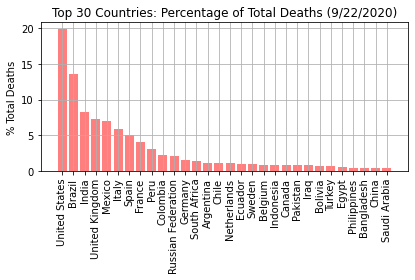

In [50]:
x_axis = country_top_50["Country Name"]
country_count = country_top_50["Country Name"].nunique()
y_axis = country_top_50["% Total Deaths"]
z_axis = country_top_50["% Global Population"]
fig, ax = plt.subplots()
plt.bar(x=x_axis,height=y_axis, color='r', alpha=0.5, align="center")
plt.grid(True)
# plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title(f"Top 30 Countries: Percentage of Total Deaths ({today.month}/{today.day}/{today.year})")
plt.ylabel("% Total Deaths")
plt.tight_layout()
output_path_fig5 = os.path.join("charts","Pct Total Death by Country Top 30.jpg")
plt.savefig(output_path_fig5)

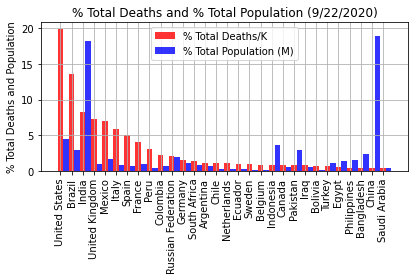

In [51]:
country_names = country_top_50["Country Name"]
country_count = country_top_50["Country Name"].nunique()
deaths = country_top_50["% Total Deaths"]
pop = country_top_50["% Global Population"]
index = np.arange(country_count)
fig,ax = plt.subplots()
bar_width = .50
opacity = .8
perc_ded_bar = plt.bar(index,deaths,bar_width,alpha = opacity,color="red",label="% Total Deaths/K")
perc_pop_bar = plt.bar(index + bar_width,pop,bar_width,alpha = opacity,color="blue",label="% Total Population (M)")
plt.xlabel = country_names
plt.title(f"% Total Deaths and % Total Population ({today.month}/{today.day}/{today.year})")
plt.ylabel("% Total Deaths and Population")
plt.xticks(index, country_names, rotation=90, ha="center")
plt.legend()
plt.grid(True)
plt.tight_layout()
output_path_fig6 = os.path.join("charts","Histogram-Per Total Deaths by Country.jpg")
plt.savefig(output_path_fig6)

In [52]:
# Add continent to country data
country_data.head(50)

,Country Name,Country Code,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,% Global Population,% Global Pop Density,2018 GDP (100T),2018 GDP(M),2018 GDP(T)
0,Afghanistan,AFG,1.948438e+10,1437.0,249347.0,31.575018,127.00,33.836449,66.008762,1.437,0.126911,0.427246,0.090755,0.194844,1.948438e+04,19.484385
1,Albania,ALB,1.514702e+10,358.0,11082.0,2.862427,258.00,41.142382,20.053634,0.358,0.031617,0.038732,0.184368,0.151470,1.514702e+04,15.147021
2,Algeria,DZA,1.740000e+11,1665.0,919595.0,43.000000,47.00,28.148952,2.653180,1.665,0.147047,0.581839,0.033586,1.740000,1.740000e+05,174.000000
3,Andorra,AND,3.218316e+09,53.0,179.0,0.076177,425.00,42.542353,1.561301,0.053,0.004681,0.001031,0.303707,0.032183,3.218316e+03,3.218316
4,Angola,AGO,1.010000e+11,147.0,481354.0,29.250009,61.00,-12.292289,17.536979,0.147,0.012983,0.395786,0.043591,1.010000,1.010000e+05,101.000000
5,Antigua and Barbuda,ATG,1.610574e+09,3.0,171.0,0.104084,610.00,17.282824,-61.791528,0.003,0.000265,0.001408,0.435909,0.016106,1.610574e+03,1.610574
6,Argentina,ARG,5.200000e+11,12799.0,1073518.0,44.938712,42.00,-35.387475,-65.178271,12.799,1.130366,0.608072,0.030013,5.200000,5.200000e+05,520.000000
7,Armenia,ARM,1.245794e+10,928.0,11484.0,2.957500,258.00,40.288148,44.932117,0.928,0.081958,0.040018,0.184368,0.124579,1.245794e+04,12.457942
8,Australia,AUS,1.430000e+12,849.0,2969907.0,25.666951,9.00,-25.732383,134.491118,0.849,0.074981,0.347303,0.006431,14.300000,1.430000e+06,1430.000000
9,Austria,AUT,4.560000e+11,765.0,32386.0,8.902600,275.00,47.585757,14.130544,0.765,0.067562,0.120462,0.196516,4.560000,4.560000e+05,456.000000


In [53]:
# import continent data
filepath = os.path.join("..","source_data","countryContinent.csv")
continents = pd.read_csv(filepath,encoding="iso-8859-1")
continents.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [54]:
# limit and rename columns
continents = continents[["code_3","continent"]]
continents.rename(columns={"code_3": "Country Code"}, inplace=True)
continents.head()

,Country Code,continent
0,AFG,Asia
1,ALA,Europe
2,ALB,Europe
3,DZA,Africa
4,ASM,Oceania


In [55]:
# merge country_data and continent on country code
country_data = pd.merge(country_data,continents,on="Country Code",how="left")
country_data.head()

,Country Name,Country Code,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,% Global Population,% Global Pop Density,2018 GDP (100T),2018 GDP(M),2018 GDP(T),continent
0,Afghanistan,AFG,1.948438e+10,1437.0,249347.0,31.575018,127.0,33.836449,66.008762,1.437,0.126911,0.427246,0.090755,0.194844,19484.384937,19.484385,Asia
1,Albania,ALB,1.514702e+10,358.0,11082.0,2.862427,258.0,41.142382,20.053634,0.358,0.031617,0.038732,0.184368,0.151470,15147.020535,15.147021,Europe
2,Algeria,DZA,1.740000e+11,1665.0,919595.0,43.000000,47.0,28.148952,2.653180,1.665,0.147047,0.581839,0.033586,1.740000,174000.000000,174.000000,Africa
3,Andorra,AND,3.218316e+09,53.0,179.0,0.076177,425.0,42.542353,1.561301,0.053,0.004681,0.001031,0.303707,0.032183,3218.316013,3.218316,Europe
4,Angola,AGO,1.010000e+11,147.0,481354.0,29.250009,61.0,-12.292289,17.536979,0.147,0.012983,0.395786,0.043591,1.010000,101000.000000,101.000000,Africa


In [56]:
# examine for blank continents
blank_continents = country_data[country_data["continent"].isnull()]
blank_continents

,Country Name,Country Code,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,% Global Population,% Global Pop Density,2018 GDP (100T),2018 GDP(M),2018 GDP(T),continent


In [57]:
# group by continent and sum data
continent = country_data.groupby("continent").sum()
continent.reset_index(drop=False, inplace=True)
continent

,continent,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,% Global Population,% Global Pop Density,2018 GDP (100T),2018 GDP(M),2018 GDP(T)
0,Africa,2.333334e+12,33627.0,11001324.00,1243.255906,13295.40,110.882265,840.594670,33.627,2.969827,16.822673,9.500959,23.333336,2.333334e+06,2333.333562
1,Americas,2.748295e+13,584557.0,15186166.00,976.836800,11705.40,284.185350,-2493.674963,584.557,51.626176,13.217718,8.364737,274.829482,2.748295e+07,27482.948197
2,Asia,3.053484e+13,160225.0,11257577.00,4383.642343,48552.45,1107.446691,3225.524341,160.225,14.150552,59.315690,34.695823,305.348354,3.053484e+07,30534.835444
3,Europe,2.192860e+13,352997.0,8882695.78,746.105305,66152.20,2066.302812,656.807754,352.997,31.175549,10.095657,47.272692,219.286005,2.192860e+07,21928.600530
4,Oceania,1.666949e+12,882.0,3260117.00,40.518497,232.00,-91.478782,614.917884,0.882,0.077895,0.548262,0.165788,16.669493,1.666949e+06,1666.949255


r = 0.6737023431762323


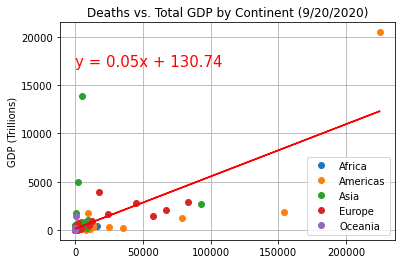

In [20]:
# Create scatterplot of Deaths and GDP by Contiment
groups = country_data.groupby("continent")
for name, group in groups:
    plt.plot(group["JH Deaths"], group["2018 GDP(T)"], marker="o", linestyle="", label=name)
plt.legend(loc ="lower right")
x_data = country_data["JH Deaths"]
y_data = country_data["2018 GDP(T)"]
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 17000), fontsize=15, color="red")
plt.grid(True)
# add pearson's r value to plot 
print(f"r = {rvalue}")
plt.title(f"Deaths vs. Total GDP by Continent ({today.month}/{today.day}/{today.year})")
plt.legend(loc ="best")
plt.xlim = (0,x_data.max()*1.05)
ylim = (0,y_data.max()*1.05)
# Note: This label will not work even when I restart the kernel
#plt.xlabel("Deaths")
plt.ylabel("GDP (Trillions)")
plt.grid(True)
output_path_fig7 = os.path.join("charts","Scatter by Continent.jpg")
plt.savefig(output_path_fig7)

In [62]:
country_data_GDP_sort = country_data.sort_values(by=["2018 GDP(T)"], ascending=False)
country_data_GDP_sort.head()

,Country Name,Country Code,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,% Global Population,% Global Pop Density,2018 GDP (100T),2018 GDP(M),2018 GDP(T),continent
166,United States,USA,2.050000e+13,224890.0,3796742.0,330.335620,87.0,45.687533,-112.494334,224.890,19.861555,4.469818,0.062171,205.0,20500000.0,20500.0,Americas
34,China,CHN,1.390000e+13,4737.0,3722342.0,1404.513080,377.0,36.560206,103.831751,4.737,0.418356,19.004667,0.269406,139.0,13900000.0,13900.0,Asia
82,Japan,JPN,4.950000e+12,2362.0,145937.0,126.010000,863.0,37.552623,137.979960,2.362,0.208604,1.705059,0.616704,49.5,4950000.0,4950.0,Asia
63,Germany,DEU,3.950000e+12,17249.0,137903.0,83.149300,603.0,51.106273,10.381711,17.249,1.523376,1.125105,0.430907,39.5,3950000.0,3950.0,Europe
165,United Kingdom,GBR,2.860000e+12,82976.0,93628.0,67.886004,725.0,54.145490,-2.885943,82.976,7.328171,0.918575,0.518089,28.6,2860000.0,2860.0,Europe


In [64]:
country_data_Pop_Dense_sort = country_data.sort_values(by=["% Global Pop Density"], ascending=False)
country_data_Pop_Dense_sort.head(50)

,Country Name,Country Code,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,% Global Population,% Global Pop Density,2018 GDP (100T),2018 GDP(M),2018 GDP(T),continent
106,Monaco,MCO,7.188238e+09,1.0,0.78,0.038300,49107.0,43.738894,7.399400,0.001,0.000088,0.000518,35.092107,0.071882,7.188238e+03,7.188238,Europe
141,Singapore,SGP,3.730000e+11,27.0,279.00,5.703600,20446.0,1.358612,103.812245,0.027,0.002385,0.077176,14.610814,3.730000,3.730000e+05,373.000000,Asia
12,Bahrain,BHR,3.765250e+10,221.0,300.00,1.543300,5136.0,26.051417,50.545957,0.221,0.019518,0.020883,3.670211,0.376525,3.765250e+04,37.652500,Asia
101,Malta,MLT,1.460358e+10,19.0,122.00,0.514564,4231.0,35.920081,14.404384,0.019,0.001678,0.006963,3.023494,0.146036,1.460358e+04,14.603582,Europe
99,Maldives,MDV,5.327457e+09,33.0,115.00,0.374775,3257.0,3.864420,73.308566,0.033,0.002914,0.005071,2.327468,0.053275,5.327457e+03,5.327457,Asia
13,Bangladesh,BGD,2.740000e+11,4913.0,55598.00,169.333966,3046.0,23.845578,90.241942,4.913,0.433900,2.291282,2.176687,2.740000,2.740000e+05,274.000000,Asia
90,Lebanon,LBN,5.496128e+10,286.0,4036.00,6.855713,1741.0,33.920788,35.879998,0.286,0.025259,0.092766,1.244127,0.549613,5.496128e+04,54.961276,Asia
14,Barbados,BRB,5.086500e+09,7.0,166.00,0.287025,1729.0,13.180518,-59.560743,0.007,0.000618,0.003884,1.235552,0.050865,5.086500e+03,5.086500,Americas
103,Mauritius,MUS,1.418180e+10,10.0,788.00,1.265577,1607.0,-20.185808,57.850255,0.010,0.000883,0.017125,1.148370,0.141818,1.418180e+04,14.181804,Africa
134,San Marino,SMR,1.637931e+09,42.0,24.00,0.034641,1471.0,43.935466,12.441431,0.042,0.003709,0.000469,1.051184,0.016379,1.637931e+03,1.637931,Europe
